# This Notebook Covers:
- Auto ML using H2o.ai
- H2o.ai has been run on the cleaned information of profiles of admit/reject of students for 29 Universities for CS students
- Error metrices have been calculated for H2o.ai classification models
- Summarization of Model below

In [2]:
import pandas as pd
import h2o
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve,auc

In [3]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.201-b09, mixed mode)
  Starting server from C:\Users\navee\Anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\navee\AppData\Local\Temp\tmpo1_mejia
  JVM stdout: C:\Users\navee\AppData\Local\Temp\tmpo1_mejia\h2o_navee_started_from_python.out
  JVM stderr: C:\Users\navee\AppData\Local\Temp\tmpo1_mejia\h2o_navee_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,02 secs
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.24.0.1
H2O cluster version age:,20 days
H2O cluster name:,H2O_from_python_navee_kunjd4
H2O cluster total nodes:,1
H2O cluster free memory:,3.500 Gb
H2O cluster total cores:,12
H2O cluster allowed cores:,12
H2O cluster status:,"accepting new members, healthy"


In [5]:
# Reading dataset from Data Folder
dataset = pd.read_csv('../../Data/clean_profile_data_all.csv')

In [6]:
dataset.head()

,gre_score,gre_score_quant,gre_score_verbal,test_score_toefl,undergraduation_score,work_ex,papers_published,university_name,status,ranking
0,316,164,152,106.0,2.90,9,3,northeastern_university,accept,15
1,314,163,151,114.0,3.53,7,3,northeastern_university,accept,15
2,307,160,147,88.0,3.00,36,0,northeastern_university,accept,15
3,330,169,161,113.0,2.40,48,3,northeastern_university,accept,15
4,316,163,153,99.0,2.71,30,0,northeastern_university,accept,15


In [7]:
#making a stratified split on university name and status to have all scenarios in train and test dataset
train,test = train_test_split(dataset, test_size=0.30, random_state=0,stratify=dataset[['university_name', 'status']])

In [10]:
#checking train test split
train.groupby(by=['university_name'])['status'].value_counts()

university_name                              status
carnegie_mellon_university                   reject     87
                                             accept     26
clemson_university                           accept     57
                                             reject     28
george_mason_university                      accept    118
                                             reject     67
georgia_institiute_of_technology             accept     61
                                             reject     28
illinois_institute_of_technology             accept    188
                                             reject    117
indiana_university_bloomington               accept    190
                                             reject     50
kansas_state_university                      accept     31
                                             reject     22
michigan_technological_university            accept     71
                                             reject     26
new_

In [9]:
test.groupby(by=['university_name'])['status'].value_counts()

university_name                              status
carnegie_mellon_university                   reject     38
                                             accept     11
clemson_university                           accept     25
                                             reject     12
george_mason_university                      accept     50
                                             reject     29
georgia_institiute_of_technology             accept     26
                                             reject     12
illinois_institute_of_technology             accept     80
                                             reject     50
indiana_university_bloomington               accept     81
                                             reject     22
kansas_state_university                      accept     13
                                             reject     10
michigan_technological_university            accept     30
                                             reject     11
new_

In [11]:
train.to_csv('../../Data/alldata_train.csv',index=False)
test.to_csv('../../Data/alldata_test.csv',index=False)

In [12]:
train['status']

7449    accept
3087    reject
3102    accept
2697    accept
4915    accept
4890    accept
3518    reject
1020    accept
6894    reject
5400    accept
4386    reject
1419    accept
3607    reject
9291    accept
5674    reject
3692    reject
5227    accept
8785    reject
4880    accept
2381    accept
7405    reject
391     accept
5812    accept
2538    accept
4589    accept
9329    reject
4409    reject
3027    reject
6518    reject
2324    reject
         ...  
6520    reject
1550    reject
2150    reject
7418    reject
1329    accept
5405    accept
4735    reject
5774    accept
6590    reject
4353    reject
4218    reject
4489    reject
6952    reject
77      accept
3181    accept
4746    reject
6147    reject
5002    reject
1963    reject
9143    accept
4064    reject
8071    accept
2037    accept
5535    reject
1175    accept
8146    reject
1206    accept
7531    reject
4270    reject
1004    accept
Name: status, Length: 6545, dtype: object

In [13]:
train_frame= h2o.import_file('../Data/alldata_train.csv')

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [14]:
training_columns=train.columns.tolist()
response_column='status'

In [15]:
training_columns

['gre_score',
 'gre_score_quant',
 'gre_score_verbal',
 'test_score_toefl',
 'undergraduation_score',
 'work_ex',
 'papers_published',
 'university_name',
 'status',
 'ranking']

In [16]:
from h2o.automl import H2OAutoML

In [17]:
model = H2OAutoML(max_models=20, seed=1)
model.train(x=training_columns, y=response_column, training_frame=train_frame)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [18]:
# best models after the H2o.ai model creation
model.leaderboard

model_id,auc,logloss,mean_per_class_error,rmse,mse
StackedEnsemble_AllModels_AutoML_20190421_184847,0.812672,0.528106,0.295999,0.420016,0.176414
StackedEnsemble_BestOfFamily_AutoML_20190421_184847,0.812144,0.528744,0.299218,0.420207,0.176574
GBM_2_AutoML_20190421_184847,0.804539,0.535684,0.307208,0.423929,0.179716
GBM_4_AutoML_20190421_184847,0.802918,0.539849,0.304104,0.425273,0.180857
GBM_grid_1_AutoML_20190421_184847_model_1,0.802622,0.573579,0.302213,0.439663,0.193304
GBM_1_AutoML_20190421_184847,0.802595,0.538182,0.299901,0.425092,0.180703
GBM_3_AutoML_20190421_184847,0.802074,0.539119,0.295257,0.425336,0.180911
GBM_grid_1_AutoML_20190421_184847_model_4,0.799797,0.60856,0.301139,0.456945,0.208799
GBM_5_AutoML_20190421_184847,0.798158,0.544081,0.312369,0.427603,0.182844
DRF_1_AutoML_20190421_184847,0.797656,0.597633,0.300892,0.428133,0.183297


In [19]:
model_path = h2o.save_model(model=model.leader, path="/Models", force=True)

In [22]:
model.leader

Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_AutoML_20190421_184847
No model summary for this model


ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.069251420250454
RMSE: 0.26315664584132015
LogLoss: 0.27307622908116075
Null degrees of freedom: 6544
Residual degrees of freedom: 6534
Null deviance: 9041.917960125375
Residual deviance: 3574.567838672394
AIC: 3596.567838672394
AUC: 0.9904133100968535
pr_auc: 0.9913636370837298
Gini: 0.980826620193707
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5424340682214746: 


,accept,reject,Error,Rate
accept,2894.0,152.0,0.0499,(152.0/3046.0)
reject,194.0,3305.0,0.0554,(194.0/3499.0)
Total,3088.0,3457.0,0.0529,(346.0/6545.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.5424341,0.9502588,188.0
max f2,0.4169043,0.9642897,234.0
max f0point5,0.6181802,0.9635882,161.0
max accuracy,0.5424341,0.9471352,188.0
max precision,0.9337146,1.0,0.0
max recall,0.2285967,1.0,311.0
max specificity,0.9337146,1.0,0.0
max absolute_mcc,0.5424341,0.8939304,188.0
max min_per_class_accuracy,0.5349428,0.9459846,191.0
max mean_per_class_accuracy,0.5424341,0.9473270,188.0


Gains/Lift Table: Avg response rate: 53.46 %, avg score: 53.59 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100840,0.9240561,1.8705344,1.8705344,1.0,0.9270901,1.0,0.9270901,0.0188625,0.0188625,87.0534438,87.0534438
,2,0.0201681,0.9205595,1.8705344,1.8705344,1.0,0.9222806,1.0,0.9246854,0.0188625,0.0377251,87.0534438,87.0534438
,3,0.0300993,0.9174341,1.8705344,1.8705344,1.0,0.9189711,1.0,0.9228000,0.0185767,0.0563018,87.0534438,87.0534438
,4,0.0400306,0.9145589,1.8705344,1.8705344,1.0,0.9157567,1.0,0.9210526,0.0185767,0.0748785,87.0534438,87.0534438
,5,0.0501146,0.9118102,1.8705344,1.8705344,1.0,0.9132091,1.0,0.9194743,0.0188625,0.0937411,87.0534438,87.0534438
,6,0.1000764,0.8996211,1.8705344,1.8705344,1.0,0.9059311,1.0,0.9127130,0.0934553,0.1871963,87.0534438,87.0534438
,7,0.1500382,0.8857502,1.8705344,1.8705344,1.0,0.8927715,1.0,0.9060726,0.0934553,0.2806516,87.0534438,87.0534438
,8,0.2,0.8679818,1.8705344,1.8705344,1.0,0.8774933,1.0,0.8989333,0.0934553,0.3741069,87.0534438,87.0534438
,9,0.3000764,0.8107825,1.8705344,1.8705344,1.0,0.8420229,1.0,0.8799535,0.1871963,0.5613032,87.0534438,87.0534438
,10,0.4,0.7308493,1.8533736,1.8662475,0.9908257,0.7711107,0.9977082,0.8527636,0.1851958,0.7464990,85.3373572,86.6247499




ModelMetricsBinomialGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.17641379695252904
RMSE: 0.4200164246223343
LogLoss: 0.5281059346438636
Null degrees of freedom: 6544
Residual degrees of freedom: 6534
Null deviance: 9042.29006860386
Residual deviance: 6912.9066844881745
AIC: 6934.9066844881745
AUC: 0.8126723947204126
pr_auc: 0.819777143506489
Gini: 0.6253447894408253
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.33120457784825164: 


,accept,reject,Error,Rate
accept,1564.0,1482.0,0.4865,(1482.0/3046.0)
reject,369.0,3130.0,0.1055,(369.0/3499.0)
Total,1933.0,4612.0,0.2828,(1851.0/6545.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3312046,0.7717914,280.0
max f2,0.1997548,0.8673496,335.0
max f0point5,0.6642406,0.7603670,137.0
max accuracy,0.4990261,0.7387319,207.0
max precision,0.9251000,0.96,1.0
max recall,0.0756862,1.0,395.0
max specificity,0.9276741,0.9996717,0.0
max absolute_mcc,0.4990261,0.4738030,207.0
max min_per_class_accuracy,0.5421768,0.7350624,189.0
max mean_per_class_accuracy,0.5396313,0.7366308,190.0


Gains/Lift Table: Avg response rate: 53.46 %, avg score: 53.43 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100840,0.9194061,1.7288273,1.7288273,0.9242424,0.9233499,0.9242424,0.9233499,0.0174336,0.0174336,72.8827284,72.8827284
,2,0.0200153,0.9126120,1.6978697,1.7134667,0.9076923,0.9162361,0.9160305,0.9198202,0.0168620,0.0342955,69.7869721,71.3466661
,3,0.0300993,0.9075974,1.8138516,1.7470982,0.9696970,0.9099105,0.9340102,0.9165002,0.0182909,0.0525865,81.3851577,74.7098156
,4,0.0400306,0.9030473,1.6978697,1.7348850,0.9076923,0.9052369,0.9274809,0.9137058,0.0168620,0.0694484,69.7869721,73.4884994
,5,0.0501146,0.8995935,1.7288273,1.7336661,0.9242424,0.9012670,0.9268293,0.9112029,0.0174336,0.0868820,72.8827284,73.3666065
,6,0.1000764,0.8797494,1.7389678,1.7363129,0.9296636,0.8898662,0.9282443,0.9005508,0.0868820,0.1737639,73.8967796,73.6312883
,7,0.1500382,0.8561133,1.6474432,1.7067198,0.8807339,0.8684892,0.9124236,0.8898745,0.0823092,0.2560732,64.7443175,70.6719813
,8,0.2,0.8281446,1.6016809,1.6804801,0.8562691,0.8427245,0.8983957,0.8780960,0.0800229,0.3360960,60.1680865,68.0480137
,9,0.3000764,0.7555229,1.4021869,1.5876685,0.7496183,0.7933300,0.8487780,0.8498263,0.1403258,0.4764218,40.2186884,58.7668487
,10,0.4,0.6677620,1.3042258,1.5168620,0.6972477,0.7131011,0.8109244,0.8156711,0.1303229,0.6067448,30.4225847,51.6861961


In [23]:
saved_model = h2o.load_model(model_path)

In [24]:
saved_model

Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_AutoML_20190421_184847
No model summary for this model


ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.069251420250454
RMSE: 0.26315664584132015
LogLoss: 0.27307622908116075
Null degrees of freedom: 6544
Residual degrees of freedom: 6534
Null deviance: 9041.917960125375
Residual deviance: 3574.567838672394
AIC: 3596.567838672394
AUC: 0.9904133100968535
pr_auc: 0.9913636370837298
Gini: 0.980826620193707
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5424340682214746: 


,accept,reject,Error,Rate
accept,2894.0,152.0,0.0499,(152.0/3046.0)
reject,194.0,3305.0,0.0554,(194.0/3499.0)
Total,3088.0,3457.0,0.0529,(346.0/6545.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.5424341,0.9502588,188.0
max f2,0.4169043,0.9642897,234.0
max f0point5,0.6181802,0.9635882,161.0
max accuracy,0.5424341,0.9471352,188.0
max precision,0.9337146,1.0,0.0
max recall,0.2285967,1.0,311.0
max specificity,0.9337146,1.0,0.0
max absolute_mcc,0.5424341,0.8939304,188.0
max min_per_class_accuracy,0.5349428,0.9459846,191.0
max mean_per_class_accuracy,0.5424341,0.9473270,188.0


Gains/Lift Table: Avg response rate: 53.46 %, avg score: 53.59 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100840,0.9240561,1.8705344,1.8705344,1.0,0.9270901,1.0,0.9270901,0.0188625,0.0188625,87.0534438,87.0534438
,2,0.0201681,0.9205595,1.8705344,1.8705344,1.0,0.9222806,1.0,0.9246854,0.0188625,0.0377251,87.0534438,87.0534438
,3,0.0300993,0.9174341,1.8705344,1.8705344,1.0,0.9189711,1.0,0.9228000,0.0185767,0.0563018,87.0534438,87.0534438
,4,0.0400306,0.9145589,1.8705344,1.8705344,1.0,0.9157567,1.0,0.9210526,0.0185767,0.0748785,87.0534438,87.0534438
,5,0.0501146,0.9118102,1.8705344,1.8705344,1.0,0.9132091,1.0,0.9194743,0.0188625,0.0937411,87.0534438,87.0534438
,6,0.1000764,0.8996211,1.8705344,1.8705344,1.0,0.9059311,1.0,0.9127130,0.0934553,0.1871963,87.0534438,87.0534438
,7,0.1500382,0.8857502,1.8705344,1.8705344,1.0,0.8927715,1.0,0.9060726,0.0934553,0.2806516,87.0534438,87.0534438
,8,0.2,0.8679818,1.8705344,1.8705344,1.0,0.8774933,1.0,0.8989333,0.0934553,0.3741069,87.0534438,87.0534438
,9,0.3000764,0.8107825,1.8705344,1.8705344,1.0,0.8420229,1.0,0.8799535,0.1871963,0.5613032,87.0534438,87.0534438
,10,0.4,0.7308493,1.8533736,1.8662475,0.9908257,0.7711107,0.9977082,0.8527636,0.1851958,0.7464990,85.3373572,86.6247499




ModelMetricsBinomialGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.17641379695252904
RMSE: 0.4200164246223343
LogLoss: 0.5281059346438636
Null degrees of freedom: 6544
Residual degrees of freedom: 6534
Null deviance: 9042.29006860386
Residual deviance: 6912.9066844881745
AIC: 6934.9066844881745
AUC: 0.8126723947204126
pr_auc: 0.819777143506489
Gini: 0.6253447894408253
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.33120457784825164: 


,accept,reject,Error,Rate
accept,1564.0,1482.0,0.4865,(1482.0/3046.0)
reject,369.0,3130.0,0.1055,(369.0/3499.0)
Total,1933.0,4612.0,0.2828,(1851.0/6545.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3312046,0.7717914,280.0
max f2,0.1997548,0.8673496,335.0
max f0point5,0.6642406,0.7603670,137.0
max accuracy,0.4990261,0.7387319,207.0
max precision,0.9251000,0.96,1.0
max recall,0.0756862,1.0,395.0
max specificity,0.9276741,0.9996717,0.0
max absolute_mcc,0.4990261,0.4738030,207.0
max min_per_class_accuracy,0.5421768,0.7350624,189.0
max mean_per_class_accuracy,0.5396313,0.7366308,190.0


Gains/Lift Table: Avg response rate: 53.46 %, avg score: 53.43 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100840,0.9194061,1.7288273,1.7288273,0.9242424,0.9233499,0.9242424,0.9233499,0.0174336,0.0174336,72.8827284,72.8827284
,2,0.0200153,0.9126120,1.6978697,1.7134667,0.9076923,0.9162361,0.9160305,0.9198202,0.0168620,0.0342955,69.7869721,71.3466661
,3,0.0300993,0.9075974,1.8138516,1.7470982,0.9696970,0.9099105,0.9340102,0.9165002,0.0182909,0.0525865,81.3851577,74.7098156
,4,0.0400306,0.9030473,1.6978697,1.7348850,0.9076923,0.9052369,0.9274809,0.9137058,0.0168620,0.0694484,69.7869721,73.4884994
,5,0.0501146,0.8995935,1.7288273,1.7336661,0.9242424,0.9012670,0.9268293,0.9112029,0.0174336,0.0868820,72.8827284,73.3666065
,6,0.1000764,0.8797494,1.7389678,1.7363129,0.9296636,0.8898662,0.9282443,0.9005508,0.0868820,0.1737639,73.8967796,73.6312883
,7,0.1500382,0.8561133,1.6474432,1.7067198,0.8807339,0.8684892,0.9124236,0.8898745,0.0823092,0.2560732,64.7443175,70.6719813
,8,0.2,0.8281446,1.6016809,1.6804801,0.8562691,0.8427245,0.8983957,0.8780960,0.0800229,0.3360960,60.1680865,68.0480137
,9,0.3000764,0.7555229,1.4021869,1.5876685,0.7496183,0.7933300,0.8487780,0.8498263,0.1403258,0.4764218,40.2186884,58.7668487
,10,0.4,0.6677620,1.3042258,1.5168620,0.6972477,0.7131011,0.8109244,0.8156711,0.1303229,0.6067448,30.4225847,51.6861961


In [25]:
test_frame= h2o.import_file('../Data/alldata_test.csv')

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [26]:
predictions=saved_model.predict(test_frame)

stackedensemble prediction progress: |████████████████████████████████████| 100%


In [27]:
predictions.as_data_frame()

,predict,accept,reject
0,accept,0.785016,0.214984
1,reject,0.552952,0.447048
2,reject,0.457722,0.542278
3,reject,0.468964,0.531036
4,accept,0.696072,0.303928
5,reject,0.092059,0.907941
6,reject,0.633711,0.366289
7,reject,0.132787,0.867213
8,reject,0.161567,0.838433
9,accept,0.652721,0.347279


In [28]:
test

,gre_score,gre_score_quant,gre_score_verbal,test_score_toefl,undergraduation_score,work_ex,papers_published,university_name,status,ranking
8074,306,162,144,101.0,2.84,3,0,university_of_texas_arlington,accept,64
1459,305,161,144,99.0,2.27,2,0,illinois_institute_of_technology,accept,97
502,320,164,156,113.0,2.75,0,0,northeastern_university,accept,15
1324,296,150,146,95.0,2.24,60,3,illinois_institute_of_technology,accept,97
4883,320,170,150,108.0,3.13,0,3,rutgers_university_new_brunswick,accept,25
8486,329,170,159,114.0,3.05,17,1,university_of_texas_austin,reject,16
2020,311,163,148,91.0,2.60,30,1,indiana_university_bloomington,reject,48
7116,308,159,149,107.0,3.56,40,2,university_of_california_irvine,accept,23
4213,307,161,146,104.0,3.33,24,0,northeastern_university,reject,15
4840,324,170,154,106.0,3.44,10,0,rutgers_university_new_brunswick,accept,25


<b> Confusion matrix for test </b>

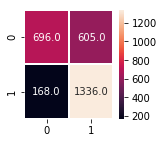

In [33]:
f,ax = plt.subplots(figsize=(2, 2))
sns.heatmap(test_cm, annot=True, linewidths=1, fmt= '.1f',ax=ax)
plt.show()

<b> Confusion Matrix for train </b>

In [34]:
train_cm = confusion_matrix(train['status'], saved_model.predict(train_frame).as_data_frame()['predict'],labels=['accept','reject'])
train_cm

stackedensemble prediction progress: |████████████████████████████████████| 100%


array([[2409,  637],
       [  20, 3479]], dtype=int64)

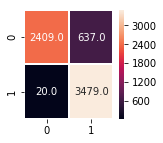

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
f,ax = plt.subplots(figsize=(2, 2))
sns.heatmap(train_cm, annot=True, linewidths=1, fmt= '.1f',ax=ax)
plt.show()

## Test Accuracy Scores for train and test

In [37]:
test_accuracy = accuracy_score(test['status'], predictions.as_data_frame()['predict'])
print('test_accuracy:',test_accuracy)
train_accuracy = accuracy_score(train['status'], saved_model.predict(train_frame).as_data_frame()['predict'])
print('train_accuracy:',train_accuracy)
from sklearn.metrics import f1_score
test_f1_score = f1_score(test['status'], predictions.as_data_frame()['predict'],pos_label='accept')
print('test_f1_score:',test_f1_score)
train_f1_score = f1_score(train['status'], saved_model.predict(train_frame).as_data_frame()['predict'],pos_label='accept')
print('train_f1_score:',train_f1_score)

test_accuracy: 0.7244206773618538
stackedensemble prediction progress: |████████████████████████████████████| 100%
train_accuracy: 0.8996180290297937
test_f1_score: 0.6429561200923788
stackedensemble prediction progress: |████████████████████████████████████| 100%
train_f1_score: 0.88


## AUC ROC Curve

stackedensemble prediction progress: |████████████████████████████████████| 100%


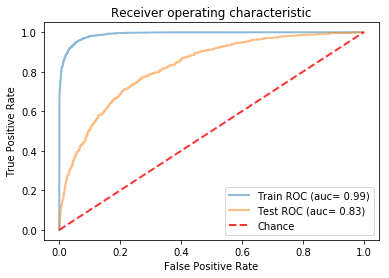

In [39]:
#test and train roc
test_fpr,test_tpr,test_thresholds = metrics.roc_curve(test['status'], predictions.as_data_frame()['accept'],pos_label='accept')
test_roc_auc = auc(test_fpr, test_tpr)
train_fpr,train_tpr,train_thresholds = metrics.roc_curve(train['status'], saved_model.predict(train_frame).as_data_frame()['accept'],pos_label='accept')
train_roc_auc = auc(train_fpr, train_tpr)
plt.plot(train_fpr, train_tpr, lw=2, alpha=0.5,
             label='Train ROC (auc= %0.2f)' % (train_roc_auc))
plt.plot(test_fpr, test_tpr, lw=2, alpha=0.5,
             label='Test ROC (auc= %0.2f)' % (test_roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [40]:
predictions.as_data_frame()['predict']

0       accept
1       reject
2       reject
3       reject
4       accept
5       reject
6       reject
7       reject
8       reject
9       accept
10      reject
11      accept
12      accept
13      accept
14      reject
15      accept
16      accept
17      accept
18      reject
19      reject
20      reject
21      reject
22      accept
23      reject
24      accept
25      reject
26      reject
27      accept
28      reject
29      reject
         ...  
2775    accept
2776    reject
2777    reject
2778    reject
2779    reject
2780    accept
2781    accept
2782    reject
2783    reject
2784    accept
2785    reject
2786    reject
2787    reject
2788    reject
2789    reject
2790    accept
2791    reject
2792    reject
2793    reject
2794    reject
2795    accept
2796    reject
2797    reject
2798    reject
2799    reject
2800    accept
2801    reject
2802    accept
2803    reject
2804    reject
Name: predict, Length: 2805, dtype: object

In [41]:
testing_df=test_frame.as_data_frame().join(predictions.as_data_frame())

In [43]:
wrong_prediction = testing_df.loc[testing_df['status']!=testing_df['predict'],:]

In [47]:
# wrong prediction results
wrong_prediction.university_name.value_counts()

northeastern_university                        161
state_university_of_new_york_at_stony_brook     57
syracuse_university                             52
university_of_north_carolina_at_charlotte       46
illinois_institute_of_technology                44
new_york_university                             38
north_carolina_state_university_raleigh         38
university_of_california_irvine                 32
university_of_texas_arlington                   29
george_mason_university                         27
rutgers_university_new_brunswick                27
rochester_institute_of_technology               26
texas_a_m_university_college_station            25
indiana_university_bloomington                  23
university_of_colorado_boulder                  22
university_of_texas_dallas                      20
clemson_university                              18
kansas_state_university                         13
university_of_cincinnati                        12
carnegie_mellon_university     

<b> Summarization of the H2o.ai Results</b>

Best 4 Model have been summarized below:
- StackedEnsemble_AllModels_AutoML_20190421_184847
- StackedEnsemble_BestOfFamily_AutoML_20190421_184847
- GBM_2_AutoML_20190421_184847
- GBM_4_AutoML_20190421_184847

<b> Best Model Summary : StackedEnsemble_AllModels_AutoML_20190421_184847</b>
<table>
  <tr>
    <th>Model</th>
    <th>Train Accuracy</th> 
    <th>Test Accuracy</th>
    <th>F1 Score - Train</th> 
    <th>F1 Score - Test</th>
    <th>AUC-ROC Curve - Test</th>
    <th>AUC-ROC Curve - Train</th>
  </tr>
  <tr>
    <td>StackedEnsemble_AllModels_AutoML_20190421_184847</td>
    <td>0.90</td> 
    <td>0.72</td>
    <td>0.88</td> 
    <td>0.64</td>
    <td>0.83</td> 
    <td>0.99</td>
  </tr>

</table>